# Advanced Data Science
<p/>

### Data Preprocessing - Transformation (Scaling and Discretization)

In [7]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)

#Pull in the libraries we need
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_diabetes

#New libraries for access to transformation tasks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer

#Pull in the plotting library and specify to display inline/static images
import matplotlib.pyplot as plt
%matplotlib inline

## Scikit Learn `load_diabetes`
---
We access the Scikit Learn Toolkit at: https://scikit-learn.org

To get to the pre-loaded data, navigate to the API menu to find:<br>
https://scikit-learn.org/stable/api/sklearn.datasets.html

Our experiments today will be using the `load_diabetes` dataset

In [8]:
#First step is to load the data into an oject
diabetesRaw = load_diabetes()
diabetesRaw.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [9]:
#Ultimately, we want the data in a pandas dataframe
diabetesData = DataFrame(diabetesRaw.data, columns=diabetesRaw.feature_names)
diabetesData.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
diabetesData.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Min-Max Scaling (Normalization)

In [11]:
#Demonstrating the Min-Max Scaling (Normalization), using the MinMaxScaler
#This is a 3 step process, setup scaler object, fit, then transform the data
scalerMinMax = MinMaxScaler()
diabetesDataTransformed = scalerMinMax.fit_transform(diabetesData)

#Convert returned numpy array to a Dataframe
diabetesDataTransformed = pd.DataFrame(diabetesDataTransformed, columns=diabetesRaw.feature_names)

print('Min-Max Scaled Data (note valules are in a [0, 1] range):')
diabetesDataTransformed.describe()
#diabetesDataTransformed.head()

Min-Max Scaled Data (note valules are in a [0, 1] range):


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459817,0.451668,0.367725,0.360889,0.291996,0.485560,0.503942
std,0.218484,0.499561,0.182567,0.194807,0.169647,0.151460,0.167977,0.182010,0.183366,0.174187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357542,0.382576
50%,0.516667,0.000000,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478062,0.500000
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Z-Score Scaling (Standardization)

In [12]:
#Demonstrating the Z-Score Scaling (Standardization), using the StandardScaler
#This is a 3 step process, setup scaler object, fit, then transform the data
scalerStd = StandardScaler()
diabetesDataTransformedStd = scalerStd.fit_transform(diabetesData)

#Convert returned numpy array to a Dataframe
diabetesDataTransformedStd = pd.DataFrame(diabetesDataTransformedStd, columns=diabetesRaw.feature_names)

print('Standaardized Data (note zero mean and unit std. deviation):')
diabetesDataTransformedStd.describe()
#diabetesDataTransformed.head()

Standaardized Data (note zero mean and unit std. deviation):


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02
mean,-8.037814e-18,2.290777e-16,2.009453e-17,-1.607563e-17,8.037814e-18,4.018907e-18,-4.018907e-18,2.330966e-16,0.000000,-4.018907e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363050e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651040,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706500e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-0.698949,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192138e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-0.040937,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493678e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,0.681851,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776058e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808722,2.851075e+00


## Log Scaling

In [13]:
#Demonstrating the Log Scaling, using the np.log (natural log)
#Note: you can use other bases, such as np.log10 for base 10
diabetesDataTransformedLog = np.log(diabetesData)

print('Log Transformed Data:')
diabetesDataTransformedLog.describe()
#diabetesDataTransformed.head()

Log Transformed Data:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,240.000000,2.070000e+02,195.000000,198.000000,202.000000,203.000000,199.000000,154.000000,212.000000,218.000000
mean,-3.657116,-2.982222e+00,-3.570008,-3.532281,-3.616889,-3.585832,-3.648357,-3.160411,-3.604547,-3.710111
std,0.969888,4.451658e-16,1.129809,1.192953,1.083141,1.028803,1.163308,0.820474,1.090719,1.032102
min,-6.347841,-2.982222e+00,-8.251303,-9.444307,-6.739747,-8.286618,-7.157746,-7.929885,-8.207952,-5.787900
25%,-4.117776,-2.982222e+00,-4.108762,-3.822530,-4.181526,-4.102420,-4.166570,-3.372352,-4.116172,-4.400873
50%,-3.368439,-2.982222e+00,-3.242601,-3.157558,-3.395888,-3.334353,-3.383941,-3.372352,-3.391629,-3.578518
75%,-2.944924,-2.982222e+00,-2.794345,-2.761663,-2.854285,-2.874191,-2.818674,-2.642122,-2.840758,-2.885144
max,-2.200690,-2.982222e+00,-1.768696,-2.024623,-1.871363,-1.615516,-1.708269,-1.686133,-2.012925,-1.997959


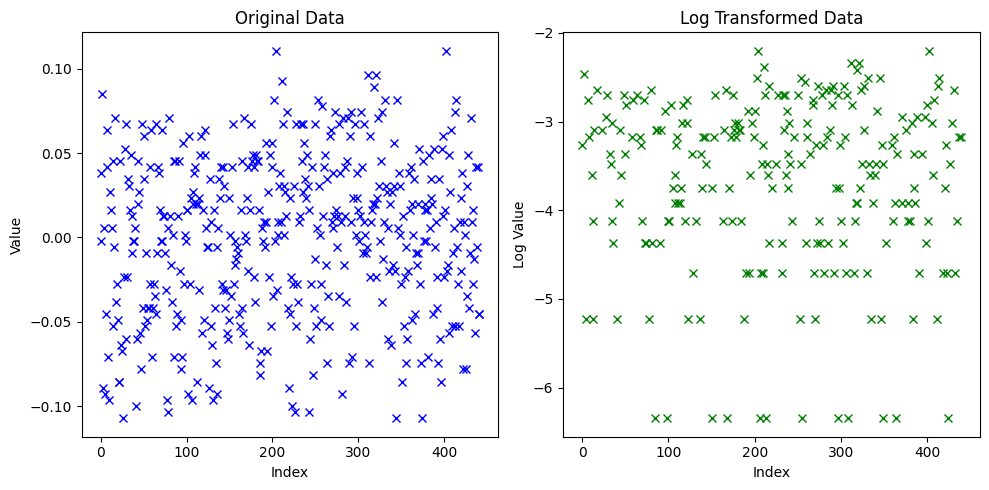

In [14]:
#One way to validate this change is through a plot 
#Look at the range of values on our y-axis, (e.g. Natural Logarithm of 0.05: -2.995)
plt.figure(figsize=(10, 5))

#Original data
plt.subplot(1, 2, 1)
plt.plot(diabetesData['age'], 'bx')
plt.yscale('linear')
plt.title('Original Data')
plt.xlabel('Index')
plt.ylabel('Value')

#Log transformed data
plt.subplot(1, 2, 2)
plt.plot(diabetesDataTransformedLog['age'], 'gx')
plt.yscale('linear')
plt.title('Log Transformed Data')
plt.xlabel('Index')
plt.ylabel('Log Value')
plt.tight_layout()
plt.show()

## Discretization

In [15]:
#Demonstrating Discretization of one of our continuous feature vectors, age
#This is a 3 step process, setup discretizer object, fit, then transform the data
#Find the index of the age feature in the diabetes dataset for the fit_transform call
arrayNames = np.array(diabetesRaw.feature_names)
ageIndex = arrayNames.tolist().index('age')

#Setting number of bins, encode, and strategy types for our KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

#Fit and transform the selected feature
discretizedData = discretizer.fit_transform(diabetesRaw.data[:, ageIndex].reshape(-1, 1))

#Add the new feature (or replace the original feature) with the discretized values in the Dataframe
diabetesData['discretizedAge'] = discretizedData

# Show the first few rows of the transformed Dataframe
diabetesData[['age','discretizedAge']].head(10)

,age,discretizedAge
0,0.038076,1.0
1,-0.001882,1.0
2,0.085299,2.0
3,-0.089063,0.0
4,0.005383,1.0
5,-0.092695,0.0
6,-0.045472,0.0
7,0.063504,2.0
8,0.041708,2.0
9,-0.070900,0.0
